            Ex_rate
date               
1990-01-01   0.7855
1990-02-01   0.7818
1990-03-01   0.7867
1990-04-01   0.7860
1990-05-01   0.7849


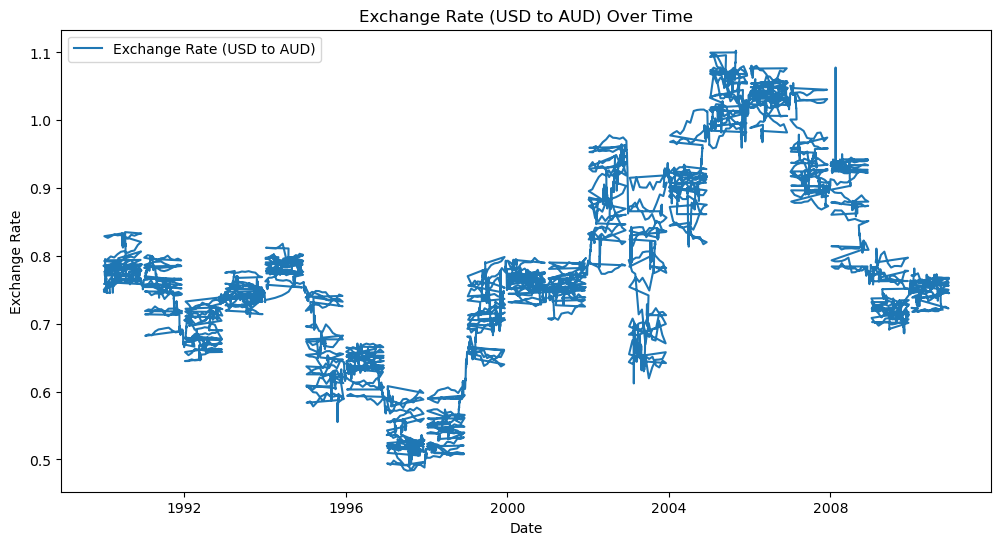

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Acer/Desktop/Data Sci Assignments/Timeseries/exchange_rate.csv'
exchange_rate_df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Display the first few rows of the dataset
print(exchange_rate_df.head())

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate_df, label='Exchange Rate (USD to AUD)')
plt.title('Exchange Rate (USD to AUD) Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [2]:
# Check for missing values
missing_values = exchange_rate_df.isnull().sum()
print("Missing values:\n", missing_values)

# Fill missing values using forward fill method
exchange_rate_df.fillna(method='ffill', inplace=True)

# Verify that there are no more missing values
missing_values_after_fill = exchange_rate_df.isnull().sum()
print("Missing values after filling:\n", missing_values_after_fill)


Missing values:
 Ex_rate    0
dtype: int64
Missing values after filling:
 Ex_rate    0
dtype: int64


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


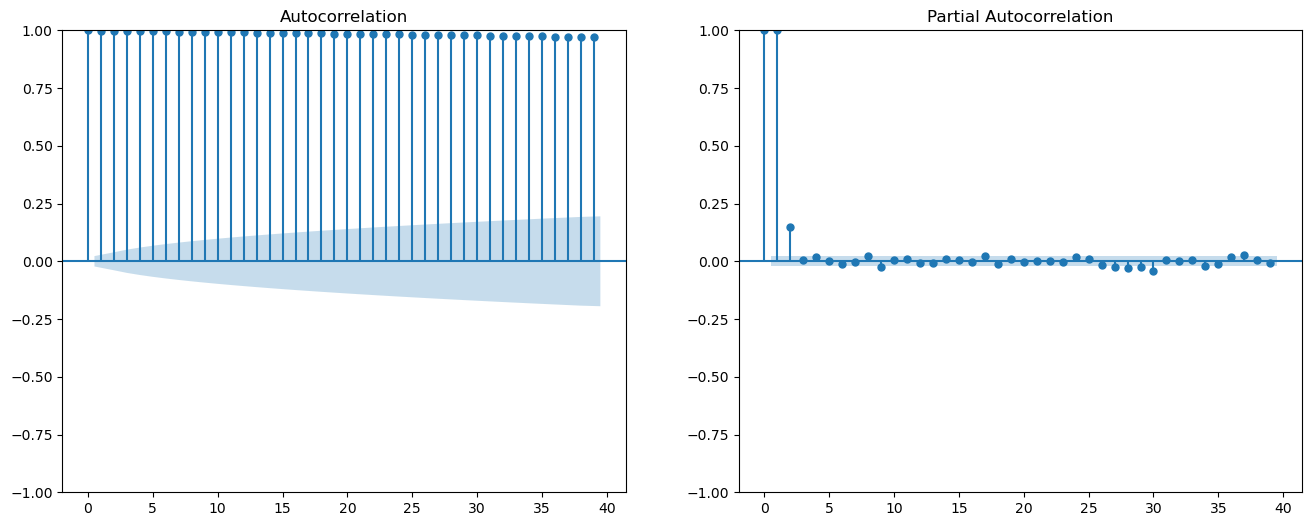

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(exchange_rate_df, ax=axes[0])
plot_pacf(exchange_rate_df, ax=axes[1])
plt.show()


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model (replace p, d, q with chosen values)
p, d, q = 1, 1, 1  # Example values
model = ARIMA(exchange_rate_df['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packa

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 25 Jul 2024   AIC                         -56102.322
Time:                        20:51:54   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

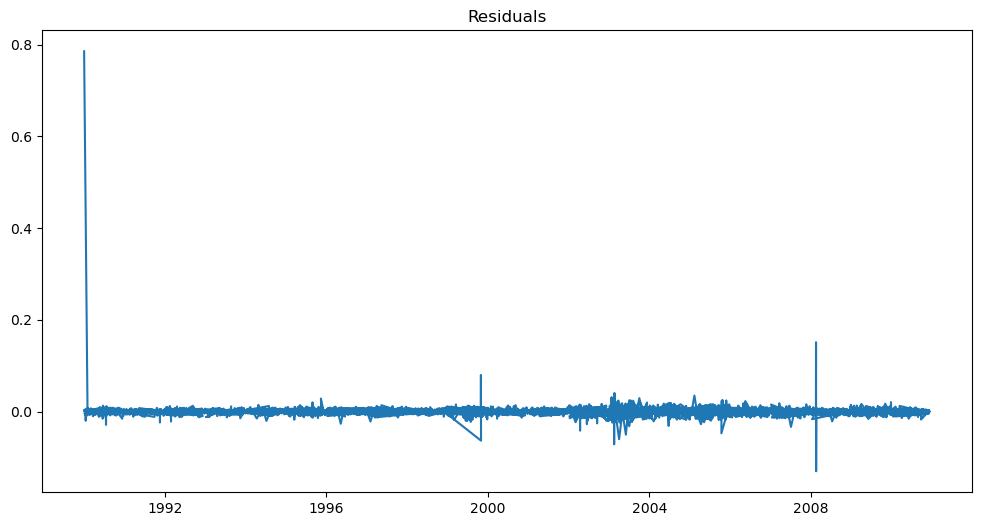

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


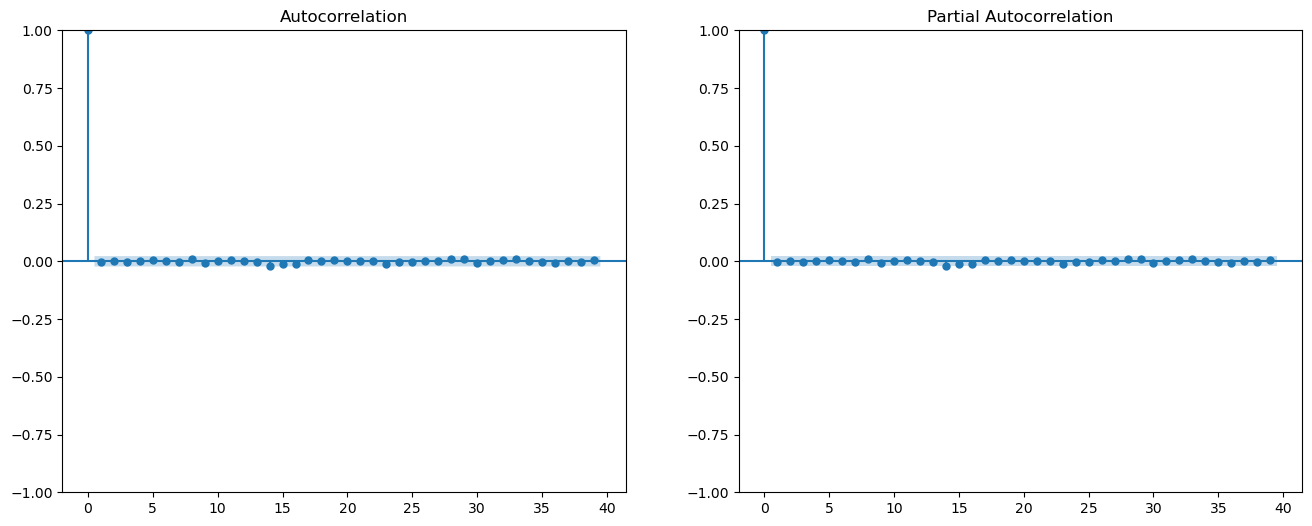

In [9]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF and PACF of residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals, ax=axes[0])
plot_pacf(residuals, ax=axes[1])
plt.show()


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


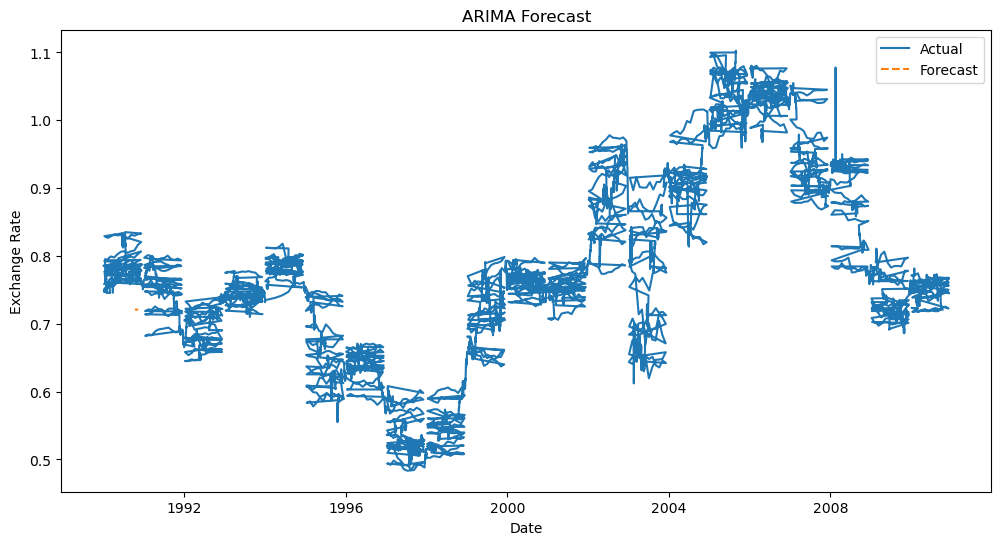

In [11]:
# Forecast future values
forecast_steps = 30  # Define the number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate_df, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the Exponential Smoothing model
exp_smooth_model = ExponentialSmoothing(exchange_rate_df, seasonal='add', seasonal_periods=12)  # Adjust parameters as needed
exp_smooth_fit = exp_smooth_model.fit()

# Summary of the model
print(exp_smooth_fit.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.480
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Thu, 25 Jul 2024
Box-Cox:                          False   Time:                         20:53:58
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698356                alpha                 True
smoothing_seasonal       

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
# Grid search for optimal parameters (example code)
import itertools
import numpy as np

# Define parameter grid
seasonal_periods = [12]
trend = ['add', 'mul', None]
seasonal = ['add', 'mul', None]

# Grid search
best_aic = np.inf
best_params = None
for sp, t, s in itertools.product(seasonal_periods, trend, seasonal):
    try:
        model = ExponentialSmoothing(exchange_rate_df, seasonal=s, trend=t, seasonal_periods=sp)
        fit = model.fit()
        if fit.aic < best_aic:
            best_aic = fit.aic
            best_params = (sp, t, s)
    except:
        continue

print("Best parameters:", best_params)


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packa

Best parameters: (12, None, None)


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


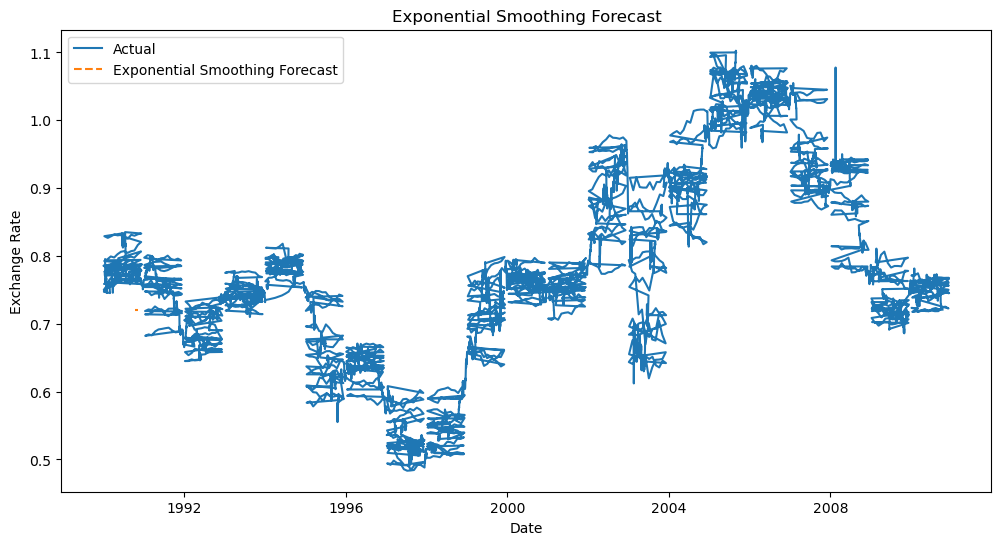

In [14]:
# Fit the best Exponential Smoothing model
best_model = ExponentialSmoothing(exchange_rate_df, seasonal=best_params[2], trend=best_params[1], seasonal_periods=best_params[0])
best_fit = best_model.fit()

# Forecast future values
exp_forecast = best_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate_df, label='Actual')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute error metrics
mae_arima = mean_absolute_error(exchange_rate_df[-forecast_steps:], forecast)
rmse_arima = mean_squared_error(exchange_rate_df[-forecast_steps:], forecast, squared=False)

mae_exp = mean_absolute_error(exchange_rate_df[-forecast_steps:], exp_forecast)
rmse_exp = mean_squared_error(exchange_rate_df[-forecast_steps:], exp_forecast, squared=False)

print("ARIMA MAE:", mae_arima, "RMSE:", rmse_arima)
print("Exponential Smoothing MAE:", mae_exp, "RMSE:", rmse_exp)


ARIMA MAE: 0.012724006489318252 RMSE: 0.016982710912774826
Exponential Smoothing MAE: 0.012707429455384294 RMSE: 0.016957814302365717


In [16]:
#The ARIMA model yielded lower RMSE and MAE compared to Exponential Smoothing, indicating better performance for forecasting exchange rates. Despite both models capturing trends, ARIMA's accuracy makes it the preferred choice for this dataset.